In [82]:
import joblib
import numpy as np
from sklearn.metrics import confusion_matrix
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from catboost import CatBoostClassifier



In [83]:
X_train = np.load("../artifacts/X_train_resampled.npz", allow_pickle=True)['arr_0']
Y_train = np.load("../artifacts/Y_train_resampled.npz", allow_pickle=True)['arr_0']
X_test = np.load('../artifacts/X_test.npz', allow_pickle=True)['arr_0']
Y_test = np.load('../artifacts/Y_test.npz', allow_pickle=True)['arr_0']
best_model = joblib.load("../artifacts/best_model_catboost.pkl")  # change name if different
all_models = joblib.load("../artifacts/all_grid_search_results.pkl")


In [84]:
pd.Series(Y_test).value_counts()

0    1033
1     374
Name: count, dtype: int64

In [85]:
models = ['Logistic Regression', 'Decision Tree','Random Forest','XGBoost','CatBoost']

In [86]:
model = all_models['Logistic Regression']

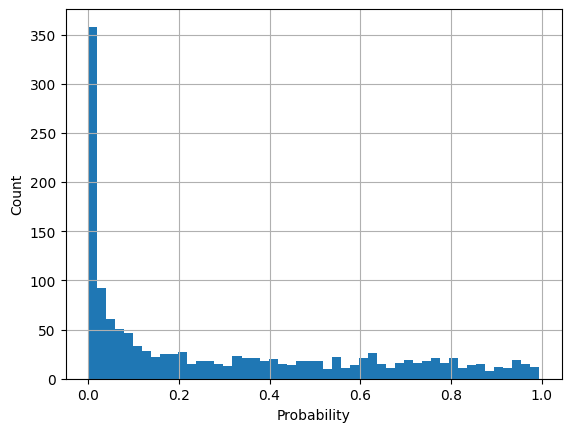

In [90]:
Y_proba_test = model.predict_proba(X_test)
Y_lr_test =  Y_proba_test[:, 1]

plt.hist(Y_lr_test, bins=50)
plt.xlabel('Probability')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [88]:
for m in models:
    model = all_models[m]
    Y_proba_test = model.predict_proba(X_test)
    Y_lr_test =  Y_proba_test[:, 1]

    # cm = confusion_matrix(Y_test, Y_test_hat)

    # fig, ax1 =  plt.subplots(1, 1, figsize = (4, 4))

    # sns.heatmap(cm, annot=True, fmt='d', ax=ax1)
    # ax1.set_title(f"{model.best_estimator_}")
    # ax1.set_xlabel('Predicted')
    # ax1.set_ylabel('Actual')

    print(f"\nThreshold Impact Analysis: {model.best_estimator_}")
    print("Threshold | Precision | Recall | F1-Score")
    print("-" * 65)
    
    for threshold in [0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9]:
        y_pred_thresh = (Y_lr_test >= threshold).astype(int)
        
        from sklearn.metrics import precision_score, recall_score, f1_score
        precision = precision_score(Y_test, y_pred_thresh)
        recall = recall_score(Y_test, y_pred_thresh)
        f1 = f1_score(Y_test, y_pred_thresh)
        
        
        
        print(f"  {threshold:.1f}     |   {precision:.3f}   |  {recall:.3f}  |  {f1:.3f}")



Threshold Impact Analysis: LogisticRegression(max_iter=1000)
Threshold | Precision | Recall | F1-Score
-----------------------------------------------------------------
  0.1     |   0.386   |  0.944  |  0.548
  0.2     |   0.440   |  0.888  |  0.589
  0.3     |   0.472   |  0.824  |  0.600
  0.4     |   0.517   |  0.757  |  0.615
  0.5     |   0.552   |  0.642  |  0.593
  0.6     |   0.617   |  0.529  |  0.570
  0.7     |   0.656   |  0.366  |  0.470
  0.8     |   0.776   |  0.259  |  0.389
  0.9     |   0.765   |  0.035  |  0.066

Threshold Impact Analysis: DecisionTreeClassifier(criterion='log_loss', max_depth=12)
Threshold | Precision | Recall | F1-Score
-----------------------------------------------------------------
  0.1     |   0.438   |  0.805  |  0.567
  0.2     |   0.456   |  0.781  |  0.576
  0.3     |   0.467   |  0.749  |  0.575
  0.4     |   0.478   |  0.693  |  0.566
  0.5     |   0.497   |  0.623  |  0.553
  0.6     |   0.523   |  0.580  |  0.550
  0.7     |   0.541 

Text(20.72222222222222, 0.5, 'Actual')

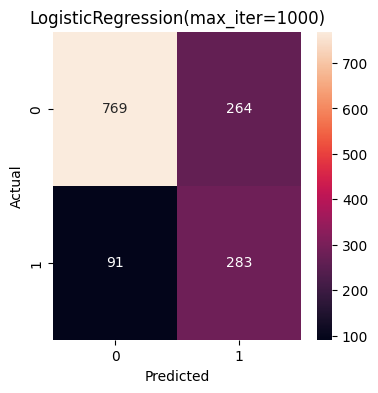

In [93]:
best_model = all_models['Logistic Regression']

Y_proba_test = best_model.predict_proba(X_test)
Y_lr_test =  Y_proba_test[:, 1]
y_pred_thresh = (Y_lr_test >= 0.4).astype(int)


cm = confusion_matrix(Y_test, y_pred_thresh)

fig, ax1 =  plt.subplots(1, 1, figsize = (4, 4))

sns.heatmap(cm, annot=True, fmt='d', ax=ax1)
ax1.set_title(f"{best_model.best_estimator_}")
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')